In [47]:
import numpy as np
import arepo
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
from tqdm import tqdm
import matplotlib as mpl
from scipy.stats import binned_statistic_2d
from numba import njit
import h5py as h5
import os
import pickle
import glob

In [2]:
basepath = '/n/holylfs05/LABS/hernquist_lab/Users/abeane/GSEgas/'

In [48]:
print(len(glob.glob(basepath + 'runs/MW3_MHG0.25_GSE6_kick/lvl4/output/snapdir_*/*.0.hdf5')))

367


In [50]:
sn = arepo.Snapshot(basepath + 'runs/MW3_MHG0.25_GSE6_kick/lvl4/output', 366, combineFiles=True)

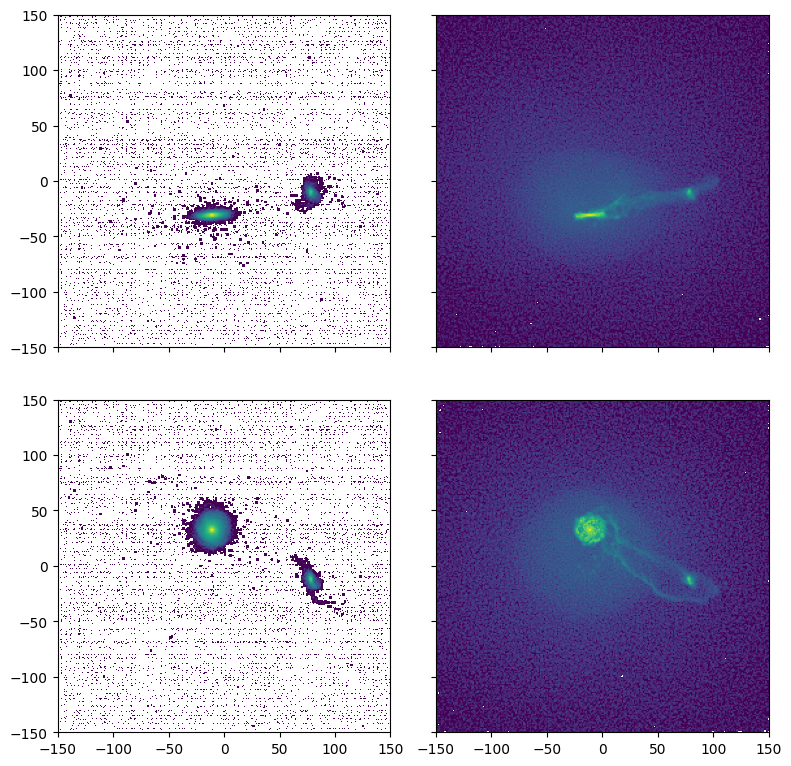

In [51]:
nres = 256
L = 300
range_xy = [[-L/2.,L/2.], [-L/2., L/2.]]
range_xz = [[-L/2.,L/2.], [-L/2., L/2.]]

extent_xy = [range_xy[0][0], range_xy[0][1], range_xy[1][0], range_xy[1][1]]
extent_xz = [range_xz[0][0], range_xz[0][1], range_xz[1][0], range_xz[1][1]]

fig, ax = plt.subplots(2, 2, figsize=(8, 8), sharex=True, sharey=True)

center = np.array([sn.BoxSize, sn.BoxSize, sn.BoxSize]) / 2.

pos = sn.part2.pos.value - center
H,   _, _ = np.histogram2d(pos[:,0], pos[:,1], bins=(nres, nres), range=range_xy)
Hxz, _, _ = np.histogram2d(pos[:,0], pos[:,2], bins=(nres, nres), range=range_xz)
ax[0][0].imshow(Hxz.T, extent=extent_xz, origin='lower', norm=mpl.colors.LogNorm())
ax[1][0].imshow(H.T, extent=extent_xy, origin='lower', norm=mpl.colors.LogNorm())

pos = sn.part0.pos.value - center
H,   _, _ = np.histogram2d(pos[:,0], pos[:,1], bins=(nres, nres), range=range_xy)
Hxz, _, _ = np.histogram2d(pos[:,0], pos[:,2], bins=(nres, nres), range=range_xz)
ax[0][1].imshow(Hxz.T, extent=extent_xz, origin='lower', norm=mpl.colors.LogNorm())
ax[1][1].imshow(H.T, extent=extent_xy, origin='lower', norm=mpl.colors.LogNorm())

ax[0][0].set(xlim=(-L/2., L/2.), ylim=(-L/2., L/2.), aspect='equal')

fig.tight_layout()
plt.show()

## check ics vel

In [20]:
ics = arepo.Snapshot(basepath + 'ics/MW3_MHG0.25_GSE6_kick/lvl4/ics.hdf5')

In [23]:
IDs = pickle.load(open(basepath + 'ics/MW3_MHG0.25_GSE6_kick/lvl4/IDs.p', 'rb'))

In [36]:
ids0 = ics.part0.id
in_GSE0 = np.logical_and(ids0 >= IDs['GSE'][0][0], ids0 <= IDs['GSE'][0][1])
vel0 = np.mean(ics.part0.vel[in_GSE0], axis=0)

ids2 = ics.part2.id
in_GSE2 = np.logical_and(ids2 >= IDs['GSE'][2][0], ids2 <= IDs['GSE'][2][1])
vel2 = np.mean(ics.part2.vel[in_GSE2], axis=0)

print('mean gas vel', vel0)
print('mean star vel', vel2)
print('')
print('gas vel dir', vel0 / np.linalg.norm(vel0))
print('star vel dir', vel2 / np.linalg.norm(vel2))

mean gas vel [ 35.71141   17.75348  -27.533875]
mean star vel [ 96.07478   46.31342  -72.877266]

gas vel dir [ 0.7368889  0.3663351 -0.5681491]
star vel dir [ 0.743752    0.35853007 -0.5641711 ]


## check non-kick run

In [37]:
sn = arepo.Snapshot(basepath + 'runs/MW3_MHG0.25_GSE6/lvl4/output', 45, combineFiles=True)

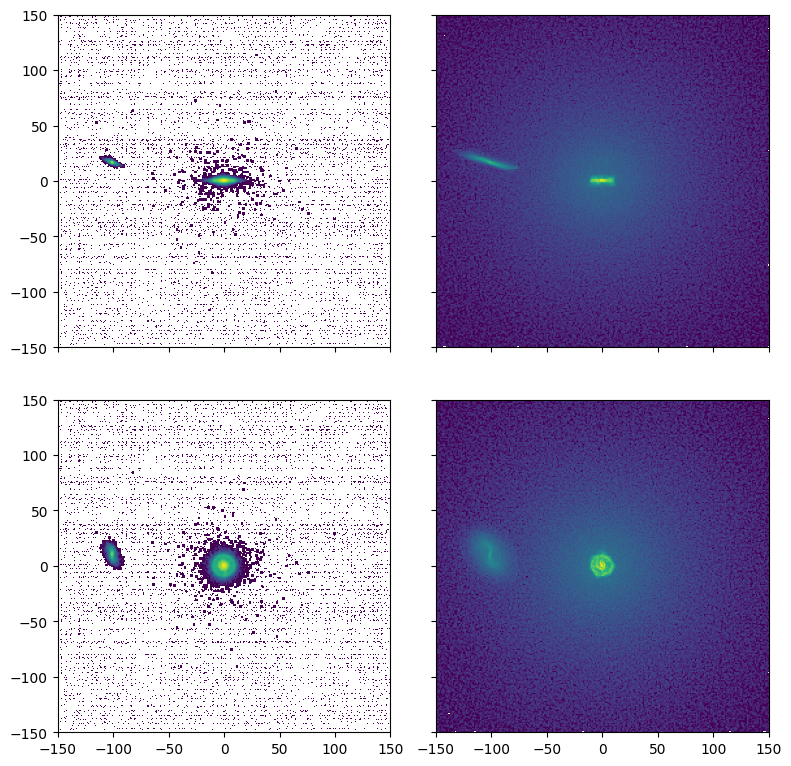

In [38]:
nres = 256
L = 300
range_xy = [[-L/2.,L/2.], [-L/2., L/2.]]
range_xz = [[-L/2.,L/2.], [-L/2., L/2.]]

extent_xy = [range_xy[0][0], range_xy[0][1], range_xy[1][0], range_xy[1][1]]
extent_xz = [range_xz[0][0], range_xz[0][1], range_xz[1][0], range_xz[1][1]]

fig, ax = plt.subplots(2, 2, figsize=(8, 8), sharex=True, sharey=True)

center = np.array([sn.BoxSize, sn.BoxSize, sn.BoxSize]) / 2.

pos = sn.part2.pos.value - center
H,   _, _ = np.histogram2d(pos[:,0], pos[:,1], bins=(nres, nres), range=range_xy)
Hxz, _, _ = np.histogram2d(pos[:,0], pos[:,2], bins=(nres, nres), range=range_xz)
ax[0][0].imshow(Hxz.T, extent=extent_xz, origin='lower', norm=mpl.colors.LogNorm())
ax[1][0].imshow(H.T, extent=extent_xy, origin='lower', norm=mpl.colors.LogNorm())

pos = sn.part0.pos.value - center
H,   _, _ = np.histogram2d(pos[:,0], pos[:,1], bins=(nres, nres), range=range_xy)
Hxz, _, _ = np.histogram2d(pos[:,0], pos[:,2], bins=(nres, nres), range=range_xz)
ax[0][1].imshow(Hxz.T, extent=extent_xz, origin='lower', norm=mpl.colors.LogNorm())
ax[1][1].imshow(H.T, extent=extent_xy, origin='lower', norm=mpl.colors.LogNorm())

ax[0][0].set(xlim=(-L/2., L/2.), ylim=(-L/2., L/2.), aspect='equal')

fig.tight_layout()
plt.show()